In [4]:
%pip install pandas numpy

import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\colli\\OneDrive - Strathmore University\\AI-Coursework--2025-\\Airplane_Crashes (excel sheet).csv')
df.shape


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


(5268, 13)

In [5]:
df.tail(75)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5193,03/15/2008,08:15,"Nbagu, Nigeria",Trade Wings Aviation Ltd.,NaN,Lagos - Bebi Air Strip,Beechcraft 1900D,5N-JAH,UE-322,3.0,3.0,0.0,The plane crashed while en route. Wreckage was...
5194,04/03/2008,11:00,"Lawa, Suriname",Blue Wing Airlines,NaN,Paramaribo - Lawa,Antonov An-28,PZ-TSO,1AJ007-17,19.0,19.0,0.0,While attempting to land the crew aborted the ...
5195,04/09/2008,23:27,"Bundeena, Australia",Avtex Air Services,NaN,Sydney - Brisbane,Swearingen SA227AC Metroliner III,VH-OZA,AC-600,1.0,1.0,0.0,The pilot of the mail plane reported some mino...
5196,04/11/2008,22:15,"Chrisinau, Moldova",Kata Transportation,NaN,"Chrisinau, Moldova - Antalya, Turkey - Sudan",Antonov An-32,ST-AZL,3009,8.0,8.0,0.0,Just minutes after the take off the plane trie...
5197,04/15/2008,14:30,"Goma, Congo",Hewa Bora Airways,NaN,Goma - Kisangani - Kinshasa,McDonnell Douglas DC-9-51,9Q-CHN,47731,85.0,0.0,47.0,"While attempting to takeoff, the plane failed ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [6]:
missing_table = pd.DataFrame({'missing_count': df.isna().sum(), 'missing_pct': (df.isna().sum()/len(df)*100).round(2)})
missing_table

,missing_count,missing_pct
Date,0,0.00
Time,2219,42.12
Location,20,0.38
Operator,18,0.34
Flight #,4199,79.71
Route,1707,32.40
Type,27,0.51
Registration,335,6.36
cn/In,1228,23.31
Aboard,22,0.42


In [7]:
recommendations = ['First column — typically an identifier/date column: parse dates if needed and keep original.', "Column `Time` — missing 2219 (42.12%). Recommended: Impute with mode (most frequent) or placeholder 'Unknown'; investigate category meanings.", "Column `Location` — missing 20 (0.38%). Recommended: Impute with mode (most frequent) or placeholder 'Unknown'; investigate category meanings.", "Column `Operator` — missing 18 (0.34%). Recommended: Impute with mode (most frequent) or placeholder 'Unknown'; investigate category meanings.", 'Column `Flight #` — missing 4199 (79.71%). Recommended: Drop column or keep for reference; too many missing values to impute reliably.', "Column `Route` — missing 1706 (32.38%). Recommended: Impute with mode (most frequent) or placeholder 'Unknown'; investigate category meanings.", "Column `Type` — missing 27 (0.51%). Recommended: Impute with mode (most frequent) or placeholder 'Unknown'; investigate category meanings.", "Column `Registration` — missing 335 (6.36%). Recommended: Impute with mode (most frequent) or placeholder 'Unknown'; investigate category meanings.", "Column `cn/In` — missing 1228 (23.31%). Recommended: Impute with mode (most frequent) or placeholder 'Unknown'; investigate category meanings.", 'Column `Aboard` — missing 22 (0.42%). Recommended: Impute using median (robust to outliers) or mean if distribution is symmetric.', 'Column `Fatalities` — missing 12 (0.23%). Recommended: Impute using median (robust to outliers) or mean if distribution is symmetric.', 'Column `Ground` — missing 22 (0.42%). Recommended: Impute using median (robust to outliers) or mean if distribution is symmetric.', "Column `Summary` — missing 390 (7.4%). Recommended: Impute with mode (most frequent) or placeholder 'Unknown'; investigate category meanings."]
for r in recommendations:
    print('- ' + r)


- First column — typically an identifier/date column: parse dates if needed and keep original.
- Column `Time` — missing 2219 (42.12%). Recommended: Impute with mode (most frequent) or placeholder 'Unknown'; investigate category meanings.
- Column `Location` — missing 20 (0.38%). Recommended: Impute with mode (most frequent) or placeholder 'Unknown'; investigate category meanings.
- Column `Operator` — missing 18 (0.34%). Recommended: Impute with mode (most frequent) or placeholder 'Unknown'; investigate category meanings.
- Column `Flight #` — missing 4199 (79.71%). Recommended: Drop column or keep for reference; too many missing values to impute reliably.
- Column `Route` — missing 1706 (32.38%). Recommended: Impute with mode (most frequent) or placeholder 'Unknown'; investigate category meanings.
- Column `Type` — missing 27 (0.51%). Recommended: Impute with mode (most frequent) or placeholder 'Unknown'; investigate category meanings.
- Column `Registration` — missing 335 (6.36%). R

In [8]:
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']].copy()
fatality_locations.columns = ['Date','Location','Aboard','Fatalities']

fatality_locations['Aboard'] = pd.to_numeric(fatality_locations['Aboard'], errors='coerce')
fatality_locations['Fatalities'] = pd.to_numeric(fatality_locations['Fatalities'], errors='coerce')

fatality_locations.head()


,Date,Location,Aboard,Fatalities
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0
3,09/09/1913,Over the North Sea,20.0,14.0
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0


In [9]:
max_row = fatality_locations.loc[fatality_locations['Fatalities'].idxmax()]
max_row[['Date','Location','Aboard','Fatalities']]

Date                        03/27/1977
Location      Tenerife, Canary Islands
Aboard                           644.0
Fatalities                       583.0
Name: 2963, dtype: object

In [10]:
zero_fatal = fatality_locations[fatality_locations['Fatalities']==0]
num_zero_fatal = len(zero_fatal)
num_zero_fatal

58

In [11]:

def split_location(x):
    if pd.isna(x):
        return pd.Series([pd.NA, pd.NA])
    parts = [p.strip() for p in x.rsplit(',', 1)]
    if len(parts) == 2:
        return pd.Series(parts)
    else:
        return pd.Series([parts[0], pd.NA])

fatality_locations[['Region','State/Country']] = fatality_locations['Location'].apply(split_location)
fatality_locations[['Date','Location','Region','State/Country','Aboard','Fatalities']].head()


,Date,Location,Region,State/Country,Aboard,Fatalities
0,09/17/1908,"Fort Myer, Virginia",Fort Myer,Virginia,2.0,1.0
1,07/12/1912,"AtlantiCity, New Jersey",AtlantiCity,New Jersey,5.0,5.0
2,08/06/1913,"Victoria, British Columbia, Canada","Victoria, British Columbia",Canada,1.0,1.0
3,09/09/1913,Over the North Sea,Over the North Sea,<NA>,20.0,14.0
4,10/17/1913,"Near Johannisthal, Germany",Near Johannisthal,Germany,30.0,30.0


In [12]:
top100 = fatality_locations.sort_values('Fatalities', ascending=False).head(100)
top100[['Date','Region','State/Country','Aboard','Fatalities']]

,Date,Region,State/Country,Aboard,Fatalities
2963,03/27/1977,Tenerife,Canary Islands,644.0,583.0
3568,08/12/1985,"Mt. Osutaka, near Ueno Village",Japan,524.0,520.0
4455,11/12/1996,Near Charkhidadri,India,349.0,349.0
2726,03/03/1974,Near Ermenonville,France,346.0,346.0
3562,06/23/1985,AtlantiOcean,110 miles West of Ireland,329.0,329.0
...,...,...,...,...,...
4852,04/15/2002,Busan,South Korea,166.0,128.0
3198,01/21/1980,"Elburz Mtns., near Laskarak, Markazi",Iran,128.0,128.0
1701,12/16/1960,Staten Island / Brooklyn,New York,128.0,128.0
5108,07/09/2006,Irkutsk,Russia,203.0,128.0


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


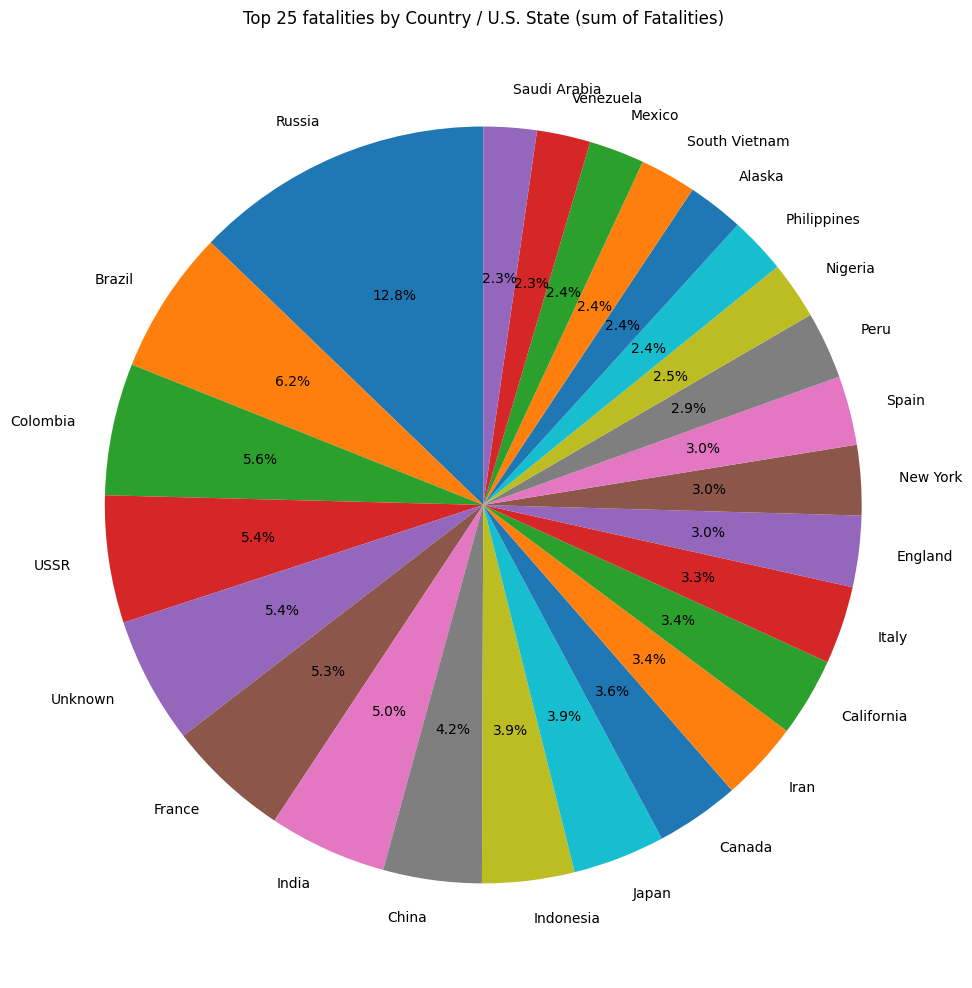

State/Country
Russia           6660.0
Brazil           3205.0
Colombia         2935.0
USSR             2831.0
Unknown          2817.0
France           2735.0
India            2624.0
China            2189.0
Indonesia        2050.0
Japan            2050.0
Canada           1867.0
Iran             1772.0
California       1754.0
Italy            1732.0
England          1584.0
New York         1558.0
Spain            1539.0
Peru             1495.0
Nigeria          1278.0
Philippines      1266.0
Alaska           1254.0
South Vietnam    1250.0
Mexico           1231.0
Venezuela        1191.0
Saudi Arabia     1183.0
Name: Fatalities, dtype: float64

In [13]:

%pip install matplotlib

import matplotlib.pyplot as plt

agg = fatality_locations.copy()
agg['State/Country'] = agg['State/Country'].fillna('Unknown')
by_country = agg.groupby('State/Country')['Fatalities'].sum().sort_values(ascending=False)
top25 = by_country.head(25)

plt.figure(figsize=(10,10))
top25.plot.pie(autopct='%1.1f%%', startangle=90, ylabel='')
plt.title('Top 25 fatalities by Country / U.S. State (sum of Fatalities)')
plt.tight_layout()
plt.show()

top25
